<a href="https://colab.research.google.com/github/thiagoteles10/Analise-RFM-com-cluterizacao-Kmeans-/blob/main/an%C3%A1lise_RFM_com_clusteriza%C3%A7%C3%A3o_usando_Kmeans_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# BIBLIOTECA PARA TRATAR OS DADOS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# BIBLIOTECA PARA EDA
import matplotlib.pyplot as plt
import seaborn as sns

# BIBLIOTECA PARA DADOS
import calendar
from datetime import datetime

In [2]:
#CARREGANDO O DATASET
vendas = pd.read_csv('vendas-por-fatura.csv')

In [3]:
#VENDO AS PRIEMIRAS INFORMAÇÕES DO DATAFRAME
vendas.head()

,N° da fatura,Data da fatura,ID Cliente,País,Quantidade,Valor
0,548370,3/30/2021 16:14:00,15528.0,United Kingdom,123,"229,33"
1,575767,11/11/2021 11:11:00,17348.0,United Kingdom,163,"209,73"
2,C570727,10/12/2021 11:32:00,12471.0,Germany,-1,"-1,45"
3,549106,4/6/2021 12:08:00,17045.0,United Kingdom,1,"39,95"
4,573112,10/27/2021 15:33:00,16416.0,United Kingdom,357,"344,83"


In [4]:
# VERIFICANDO QUANTIDADE DE LINHAS E COLUNAS
vendas.shape

(25953, 6)

In [5]:
# VERIFICANDO INFORMAÇÕES DO DATAFRAME
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25953 entries, 0 to 25952
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   N° da fatura    25953 non-null  object 
 1   Data da fatura  25953 non-null  object 
 2   ID Cliente      22229 non-null  float64
 3   País            25953 non-null  object 
 4   Quantidade      25953 non-null  int64  
 5   Valor           25953 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.2+ MB


Podemos ver que estamos sem dados de identificação de 3724 clientes na coluna ID Cliente, motivo pelo qual não conseguimos identificar os clientes.

In [6]:
# REMOVENDO LINHAS COM VALORES NULOS DA COLUNA 'ID_Cliente' 
vendas = vendas.dropna(subset=["ID Cliente"])

In [7]:
# CONVERTENDO DATA QUE ESTAVA NO FORMATO OBJECT PARA DATETIME
vendas['Data da fatura'] = pd.to_datetime(vendas['Data da fatura'])

# Obtendo Ano e Mês da data 
vendas['Ano_mes'] = vendas['Data da fatura'].dt.to_period('M')

In [8]:
# VERIFICANDO SE AINDA HÁ VALORES NULOS EM QUAISQUER UMA DAS COLUNAS
vendas.isnull().values.any()

False

In [9]:
# FAZENDO UM REPLACE PARA TROCAR A VÍRGULA POR PONTO JÁ QUE O PYTHON USA PONTO COMO SEPARADOR DE CASA DECIMAL['Valor'] = df['Valor'].astype(str)
vendas['Valor'] = vendas['Valor'].astype(str)
vendas['Valor'] = vendas['Valor'].str.replace(',', '.')


In [10]:
# VERIFICANDO SE EXISTEM DADOS DUPLICADOS NO DATAFRAME
duplicados = vendas.duplicated().sum()
print(duplicados)

8


Podemos ver que há 8 linhas duplicadas no dataframe.

In [11]:
# Removendo os dados duplicados do dataset, se houver
vendas.drop_duplicates(inplace=True)

# apresentando quantidade de linhas e colunas
vendas.shape

(22221, 7)

In [12]:
#CONVERTENDO O VALOR DE OBJECT PARA FLOAT
vendas['Valor'] = vendas['Valor'].astype(float)


In [13]:
# CRIANDO A COLUNA GASTO CLIENTE QUE É A MULTIPLICAÇÃO DE QUANTIDADE X PREÇO
vendas['gasto cliente'] = vendas['Valor'] * vendas['Quantidade']

In [14]:
vendas

,N° da fatura,Data da fatura,ID Cliente,País,Quantidade,Valor,Ano_mes,gasto cliente
0,548370,2021-03-30 16:14:00,15528.0,United Kingdom,123,229.33,2021-03,28207.59
1,575767,2021-11-11 11:11:00,17348.0,United Kingdom,163,209.73,2021-11,34185.99
2,C570727,2021-10-12 11:32:00,12471.0,Germany,-1,-1.45,2021-10,1.45
3,549106,2021-04-06 12:08:00,17045.0,United Kingdom,1,39.95,2021-04,39.95
4,573112,2021-10-27 15:33:00,16416.0,United Kingdom,357,344.83,2021-10,123104.31
...,...,...,...,...,...,...,...,...
25947,C553519,2021-05-17 14:16:00,18218.0,United Kingdom,-2,-9.90,2021-05,19.80
25948,C556518,2021-06-13 10:53:00,16794.0,United Kingdom,-2,-12.70,2021-06,25.40
25949,553060,2021-05-13 10:44:00,15826.0,United Kingdom,488,720.00,2021-05,351360.00
25950,577049,2021-11-17 13:58:00,17397.0,United Kingdom,104,298.78,2021-11,31073.12


Verificamos que todas os valores negativos da coluna quantidade, correspondem a um número de fatura que se inicia com a letra C o que nos diz que essa operação corresponde a um estorno. Como nosso objetivo é saber a quantidade e valores vendidos, vamos excluir esses valores do dataframe.

In [15]:
# FILTRANDO TODAS AS FATURAS QUE COMEÇAM COM 'C'
estorno = vendas['N° da fatura'].str.startswith('C')

# verificando a quantidade de linhas identificadas
vendas[estorno].shape

(3655, 8)

Tivemos 3655 estornos que foram as compras que foram devolvidas, por esse motivo vamos remover esses estornos do dataset.

In [16]:
# REMOVENDO TODOS OS VALORES QUE FORAM ESTORNADOS DO DATASET
vendas.drop(vendas[estorno].index, inplace=True)

In [17]:
# REVENDO O NÚMERO DE LINHAS E COLUNAS APÓS A REMOÇÃO DOS VALORES ESTORNADOS
vendas.shape

(18566, 8)

In [18]:
# QUANTIS E RANKING
vendas['quantiles'] = pd.qcut(vendas['gasto cliente'], 5)
vendas['percitile_ranking'] = vendas['gasto cliente'].rank(pct=True)
vendas['rank'] = vendas['gasto cliente'].rank

## USANDO O RFM(RECÊNCIA, FREQUÊNCIA E MONETÁRIO)

* Recência (R) representa o tempo desde a última compra do cliente. Quanto mais recente a compra, maior é a pontuação do cliente nessa dimensão.

* Frequência (F) representa a frequência de compras do cliente em um período de tempo específico. Quanto mais compras o cliente fizer, maior será sua pontuação nessa dimensão.

* Valor Monetário (M) representa o valor total que o cliente gastou em suas compras. Quanto mais dinheiro o cliente gastar, maior será sua pontuação nessa dimensão.

In [19]:
#CRIANDO UMA NOVA TABELA PARA OBTER A RECÊNCIA
df_recencia = (vendas[['Ano_mes','ID Cliente']]
               .groupby('ID Cliente')['Ano_mes']
               .agg('max')
               .reset_index()
               )

df_recencia.head()

,ID Cliente,Ano_mes
0,12346.0,2021-01
1,12347.0,2021-12
2,12348.0,2021-09
3,12349.0,2021-11
4,12350.0,2021-02


In [20]:
# PEGANDO A MAIOR DATA PRESENTE NA COLUNA MES_DATA
maior_data = df_recencia.Ano_mes.max()

In [21]:
# FUNÇÃO PARA CALCULAR A DIFERENÇA ENTRE AS DATAS EM MESES
def dif_mes(maior_data,data_val):
  ''' calcula quantos meses entre a nossa data de referência e 
  a última compra do usuário
  '''
  return 12 * (maior_data.year - data_val.year ) + (maior_data.month - data_val.month)

In [22]:
# CRIANDO A COLUNA DA RECÊNCIA EM MESES
df_recencia['recencia'] = df_recencia['Ano_mes'].apply(lambda data_val: dif_mes(maior_data,data_val))

In [23]:
#VERIFICANDO A TABELA COM A NOVA COLUNA CRIADA
df_recencia.head()

,ID Cliente,Ano_mes,recencia
0,12346.0,2021-01,11
1,12347.0,2021-12,0
2,12348.0,2021-09,3
3,12349.0,2021-11,1
4,12350.0,2021-02,10


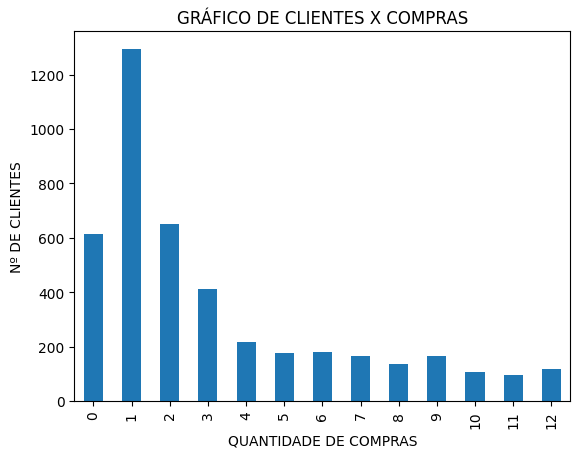

In [24]:
# PLOTANDO UM GRÁFICO DA COLUNA RECÊNCIA
df_recencia['recencia'].value_counts().sort_index().plot.bar();
plt.xlabel('QUANTIDADE DE COMPRAS');
plt.ylabel('Nº DE CLIENTES');
plt.title('GRÁFICO DE CLIENTES X COMPRAS');

In [25]:
# EXCLUIDO O CAMPO ANO_MES PARA FICARMOS APENAS COM O ID DO CLIENTE E A RECÊNCIA
df_recencia = df_recencia.drop('Ano_mes',axis=1)

In [26]:
# PEGANDO AS COMPRAS(FREQUÊNCIA) E OS GASTOS(VALOR)
df_freq_mon = vendas[['ID Cliente', 'N° da fatura', 'Valor']]


In [27]:
# CONTANDO OS PEDIDOS E PEGANDO A MÉDIA DE GASTOS POR COMPRA
df_freq_mon = (
    df_freq_mon.groupby('ID Cliente')[['N° da fatura', 'Valor']].
    agg({'N° da fatura': 'count',
         'Valor': 'mean'
    }).reset_index())


In [28]:
# RENOMEANDO AS COLUNAS
df_freq_mon = df_freq_mon.rename(columns={'N° da fatura':'frequencia', 'Valor':'monetario'})

In [29]:
# ARREDONDADNDO OS VALORES
df_freq_mon['monetario'] = df_freq_mon['monetario'].round(2)

In [30]:
df_freq_mon.head()

,ID Cliente,frequencia,monetario
0,12346.0,1,77183.60
1,12347.0,7,615.71
2,12348.0,4,449.31
3,12349.0,1,1757.55
4,12350.0,1,334.40


In [31]:
#UNINDO OS DATASETS E PREECHENDO OS VALORES MISSING COM ZERO QUE SIGNIFICA QUE NÃO HOUVE COMPRAS
df_rfv = df_recencia.merge(df_freq_mon, on='ID Cliente',how='left')
df_rfv = df_rfv.fillna(0)
df_rfv.head()

,ID Cliente,recencia,frequencia,monetario
0,12346.0,11,1,77183.60
1,12347.0,0,7,615.71
2,12348.0,3,4,449.31
3,12349.0,1,1,1757.55
4,12350.0,10,1,334.40


In [32]:
# CARREGANDO A BIBLIOTECA DE SCALING PARA NORMALIZAÇÃO DAS VARIÁVEIS
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# SEPARANDO AS COLUNAS DO MODELO
colunas = ['recencia','frequencia','monetario']

In [33]:
# CRIANDO UMA CÓPIA DO DATAFRAME ORIGINAL

standardized_data = df_rfv.copy()

#CARREGA O SCALER
scaler = StandardScaler()

# TREINA O ALGORITMO NOS DADOS ORIGINAIS
scaler.fit(df_rfv[colunas])

StandardScaler()

In [34]:
# APLICANDO AS TRANSFORMAÇÕES E ALOCANDO AS FEATURES NO DATAFRAME CÓPIA
standardized_features = scaler.transform(df_rfv[colunas])
standardized_data[colunas] = standardized_features

In [35]:
standardized_data

,ID Cliente,recencia,frequencia,monetario
0,12346.0,2.368505,-0.424354,42.740836
1,12347.0,-0.981117,0.352171,0.109751
2,12348.0,-0.067583,-0.036091,0.017103
3,12349.0,-0.676606,-0.424354,0.745499
4,12350.0,2.063994,-0.424354,-0.046876
...,...,...,...,...
4334,18280.0,1.759483,-0.424354,-0.132508
4335,18281.0,0.845950,-0.424354,-0.188063
4336,18282.0,-0.981117,-0.294933,-0.183497
4337,18283.0,-0.981117,1.516959,-0.160163


## USANDO O MÉTODO DO COTOVELO PARA DETERMINAR O NÚMERO DE CLUSTERS

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Ler o dataset e selecionar as variáveis padronizadas
data = standardized_data
X = data[['frequencia', 'recencia', 'monetario']].values



In [83]:
X

array([[-4.24353614e-01,  2.36850541e+00,  4.27408357e+01],
       [ 3.52171443e-01, -9.81116643e-01,  1.09750587e-01],
       [-3.60910855e-02, -6.75833567e-02,  1.71032316e-02],
       ...,
       [-2.94932771e-01, -9.81116643e-01, -1.83497224e-01],
       [ 1.51695903e+00, -9.81116643e-01, -1.60162785e-01],
       [-1.65511928e-01, -3.72094452e-01,  1.07924366e-01]])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

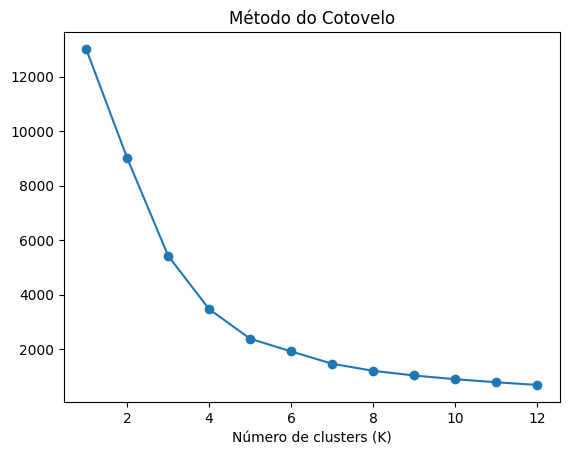

In [84]:
# Padronizar os dados
#scaler = StandardScaler()
#X_std = scaler.fit_transform(X)

# Calcular a inércia para diferentes valores de K
inertia = []
for k in range(1, 13):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Traçar o método do cotovelo
plt.plot(range(1, 13), inertia, marker='o');
plt.xlabel('Número de clusters (K)');
plt.title('Método do Cotovelo');
plt.show();


In [94]:
# TREINANDO COM 3 CLUSTERS
kmeans = KMeans(n_clusters=4)
kmeans.fit(standardized_data[colunas])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [95]:
# ATRIBUINDO RÓTULOS AOS INDIVÍDUOS
df_rfv['Cluster'] = kmeans.labels_

# VERIFICANDO O DATAFRAME COM CLUSTERS ADICIONADOS
df_rfv.head()

,ID Cliente,recencia,frequencia,monetario,Cluster
0,12346.0,11,1,77183.60,2
1,12347.0,0,7,615.71,0
2,12348.0,3,4,449.31,0
3,12349.0,1,1,1757.55,0
4,12350.0,10,1,334.40,1


### Investigando o comportamento dos clusters

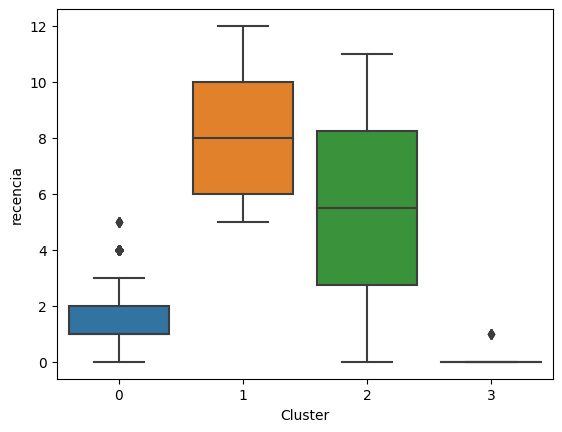

In [96]:
sns.boxplot(x ='Cluster', y='recencia',data=df_rfv);

No cluster 0 temos os clientes top 2 de recência mais baixa ou seja, compraram a pouco tempo. No cluster 1 temos os clientes que compraram faz muito tempo ou seja, que tem o intervalo maior entre as compras. No cluster 2 temos os clientes de recência intermediária. No cluster 3 temos os clientes que fizeram compras a pouco tempo ou seja, são os clientes mais recentes.

---



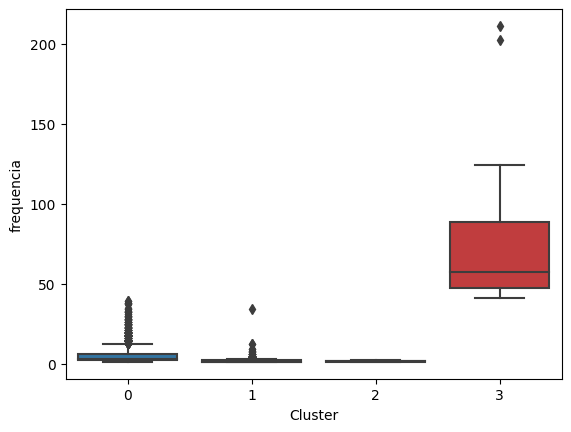

In [97]:
sns.boxplot(x ='Cluster', y='frequencia',data=df_rfv);

No cluster 3 temos os compradores que compram com mais frequência ou seja, são os considerados clientes fiéis.

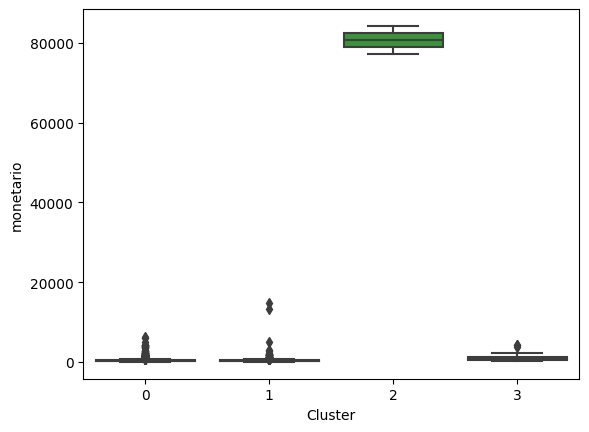

In [98]:
sns.boxplot(x ='Cluster', y='monetario',data=df_rfv);

No cluster dois, temos os clientes que mais gastam na empresa com uma recência intermediária porém com uma frequência muito baixa ou seja, eles fazem uma compra com um valor muito alto uma única vez.

In [99]:
# VERIFICANDO AS MÉTRICAS POR CLUSTER

centroide_df = (
    df_rfv.groupby('Cluster')[['ID Cliente','recencia','frequencia', 'monetario']]
    .agg(
        {
        'ID Cliente': 'nunique',
         'recencia' : 'mean',
         'frequencia': 'mean',
         'monetario' : 'mean'
    }
    ).reset_index()   
)

In [100]:
# RENOMEANDO A FEATURE ID CLIENTE
centroide_df = centroide_df.rename(columns={'ID Cliente':'compradores'})

In [101]:
# ORDENANDO POR RECÊNCIA
centroide_df.sort_values(by='recencia',ascending=True)

,Cluster,compradores,recencia,frequencia,monetario
3,3,23,0.173913,76.130435,1172.015652
0,0,3170,1.488328,4.717981,390.408047
2,2,2,5.500000,1.500000,80709.925000
1,1,1144,8.083042,1.622378,341.170691


In [105]:
#NOMEANDO OS GRUPOS
rotulo_compradores = ['cliente recente','cliente casual','cliente inativo lucrativo','** cliente TOP **']

centroide_df['classificação'] = rotulo_compradores

centroide_df

,Cluster,compradores,recencia,frequencia,monetario,classificação
0,0,3170,1.488328,4.717981,390.408047,cliente recente
1,1,1144,8.083042,1.622378,341.170691,cliente casual
2,2,2,5.500000,1.500000,80709.925000,cliente inativo lucrativo
3,3,23,0.173913,76.130435,1172.015652,** cliente TOP **


Resumo detalhado sobre dados apresentados em uma tabela com cinco colunas e quatro linhas, representando diferentes clusters de compradores com base em suas características de compra. Cada linha da tabela contém informações sobre um cluster específico e sua respectiva classificação. A seguir, está um resumo detalhado de cada um desses clusters e suas classificações:

- Cluster 0: Este cluster representa compradores recentes, com uma média de 1,49 de recência, o que significa que eles fizeram suas últimas compras recentemente. A frequência média de compras é de 4,72, o que indica que eles fizeram algumas compras, mas não com muita frequência. O valor monetário médio de suas compras é de R$ 390,41. Esses compradores foram classificados como "clientes recentes".

- Cluster 1: Este cluster representa compradores casuais, com uma média de 8,08 de recência, o que significa que eles fizeram suas últimas compras há algum tempo. A frequência média de compras é de 1,62, o que indica que eles não fazem compras com muita frequência. O valor monetário médio de suas compras é de R$ 341,17. Esses compradores foram classificados como "clientes casuais".

- Cluster 2: Este cluster representa compradores inativos, com uma média de 5,5 de recência, o que significa que eles fizeram suas últimas compras há algum tempo. A frequência média de compras é de 1,5, o que indica que eles fazem poucas compras. No entanto, o valor monetário médio de suas compras é muito alto, chegando a R$ 80.709,93. Esses compradores foram classificados como "clientes inativos lucrativos".

- Cluster 3: Este cluster representa os principais compradores, com uma média de 0,17 de recência, o que significa que eles fizeram suas últimas compras há muito pouco tempo. A frequência média de compras é de 76,13, o que indica que eles fazem muitas compras. O valor monetário médio de suas compras é de R$ 1.172,02. Esses compradores foram classificados como "clientes TOP".

Em resumo, os clusters de compradores apresentados nesta tabela representam diferentes tipos de compradores com base em suas características de compra, como a recência, frequência e valor monetário. Cada cluster foi classificado de acordo com o tipo de cliente que representa, incluindo clientes recentes, casuais, inativos lucrativos e clientes TOP. Essas informações podem ser usadas para orientar a tomada de decisões de negócios, como estratégias de marketing e atendimento ao cliente.